In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import seaborn as sns 

In [2]:
hourly_df=pd.read_pickle("C:\\Users\\Chike\\Documents\\Projects\\weather_repo\\data\\raw\\1.0_Montreal_1990-01-01_2021-04-23.pkl")
hourly_df

,Time,Wind,Condition,Temperature_Fahrenheit,Dew_Point_Fahrenheit,Humidity_Float,Wind_Speed_MPH,Wind_Gust_MPH,Pressure_IN,Precip_IN,Time_Clean,Date
0,1:00 AM,S,Cloudy,36,36,1.00,6,0,29,0,01:00:00,1990-01-01
2,2:00 AM,SW,Cloudy,38,38,0.97,13,0,29,0,02:00:00,1990-01-01
3,3:00 AM,SSW,Cloudy / Windy,37,34,0.87,29,35,29,0,03:00:00,1990-01-01
5,4:00 AM,SW,Cloudy / Windy,36,0,0.87,23,0,29,0,04:00:00,1990-01-01
7,5:00 AM,SW,Cloudy / Windy,36,0,0.87,21,31,29,0,05:00:00,1990-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
30,7:00 PM,WNW,Mostly Cloudy,39,16,0.39,14,24,29,0,19:00:00,2021-04-22
31,8:00 PM,W,Partly Cloudy,39,16,0.39,12,0,29,0,20:00:00,2021-04-22
32,9:00 PM,W,Partly Cloudy,39,14,0.36,12,0,29,0,21:00:00,2021-04-22
33,10:00 PM,W,Mostly Cloudy,39,16,0.39,12,17,29,0,22:00:00,2021-04-22


In [3]:
hourly_df['Temperature_Fahrenheit']=pd.to_numeric(hourly_df['Temperature_Fahrenheit'])
hourly_df['Dew_Point_Fahrenheit']=pd.to_numeric(hourly_df['Dew_Point_Fahrenheit'])
hourly_df['Wind_Speed_MPH']=pd.to_numeric(hourly_df['Wind_Speed_MPH'])
hourly_df['Wind_Gust_MPH']=pd.to_numeric(hourly_df['Wind_Gust_MPH'])
hourly_df['Date']=pd.to_datetime(hourly_df['Date'],infer_datetime_format=True)
daily_df=(hourly_df
          .groupby(['Date'],as_index=True)
          .agg({'Temperature_Fahrenheit':['min','max','mean']
              ,'Dew_Point_Fahrenheit':['min','max','mean']
              ,'Wind_Speed_MPH':['min','max','mean']
              ,'Wind_Gust_MPH':['min','max','mean']}))
daily_df.columns = daily_df.columns.map('{0[0]}_{0[1]}'.format) 
# daily_df['Date']=daily_df['Date_']
# daily_df.drop('Date_',axis=1)
daily_df=daily_df.reset_index()
daily_df

,Date,Temperature_Fahrenheit_min,Temperature_Fahrenheit_max,Temperature_Fahrenheit_mean,Dew_Point_Fahrenheit_min,Dew_Point_Fahrenheit_max,Dew_Point_Fahrenheit_mean,Wind_Speed_MPH_min,Wind_Speed_MPH_max,Wind_Speed_MPH_mean,Wind_Gust_MPH_min,Wind_Gust_MPH_max,Wind_Gust_MPH_mean
0,1990-01-01,16,40,25.958333,0,38,16.125000,6,29,19.333333,0,35,17.458333
1,1990-01-02,0,32,12.166667,5,25,16.708333,9,28,16.375000,0,40,10.583333
2,1990-01-03,30,34,32.000000,23,28,25.227273,2,18,10.045455,0,26,2.227273
3,1990-01-04,35,41,37.666667,0,36,28.291667,5,24,11.083333,0,35,3.708333
4,1990-01-05,19,36,24.583333,9,27,13.166667,0,14,7.916667,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11430,2021-04-18,41,55,47.541667,34,39,35.291667,2,8,5.500000,0,0,0.000000
11431,2021-04-19,46,63,53.333333,30,43,39.916667,2,15,8.125000,0,17,1.416667
11432,2021-04-20,41,54,47.666667,25,43,31.875000,2,23,15.333333,0,37,13.583333
11433,2021-04-21,28,39,32.875000,14,28,25.583333,5,15,9.083333,0,21,0.875000


In [4]:
daily_df.dtypes

Date                           datetime64[ns]
Temperature_Fahrenheit_min              int64
Temperature_Fahrenheit_max              int64
Temperature_Fahrenheit_mean           float64
Dew_Point_Fahrenheit_min                int64
Dew_Point_Fahrenheit_max                int64
Dew_Point_Fahrenheit_mean             float64
Wind_Speed_MPH_min                      int64
Wind_Speed_MPH_max                      int64
Wind_Speed_MPH_mean                   float64
Wind_Gust_MPH_min                       int64
Wind_Gust_MPH_max                       int64
Wind_Gust_MPH_mean                    float64
dtype: object

In [5]:
daily_df2=daily_df[(daily_df['Date']>"2000-01-01") & (daily_df['Date']<"2021-04-01")]

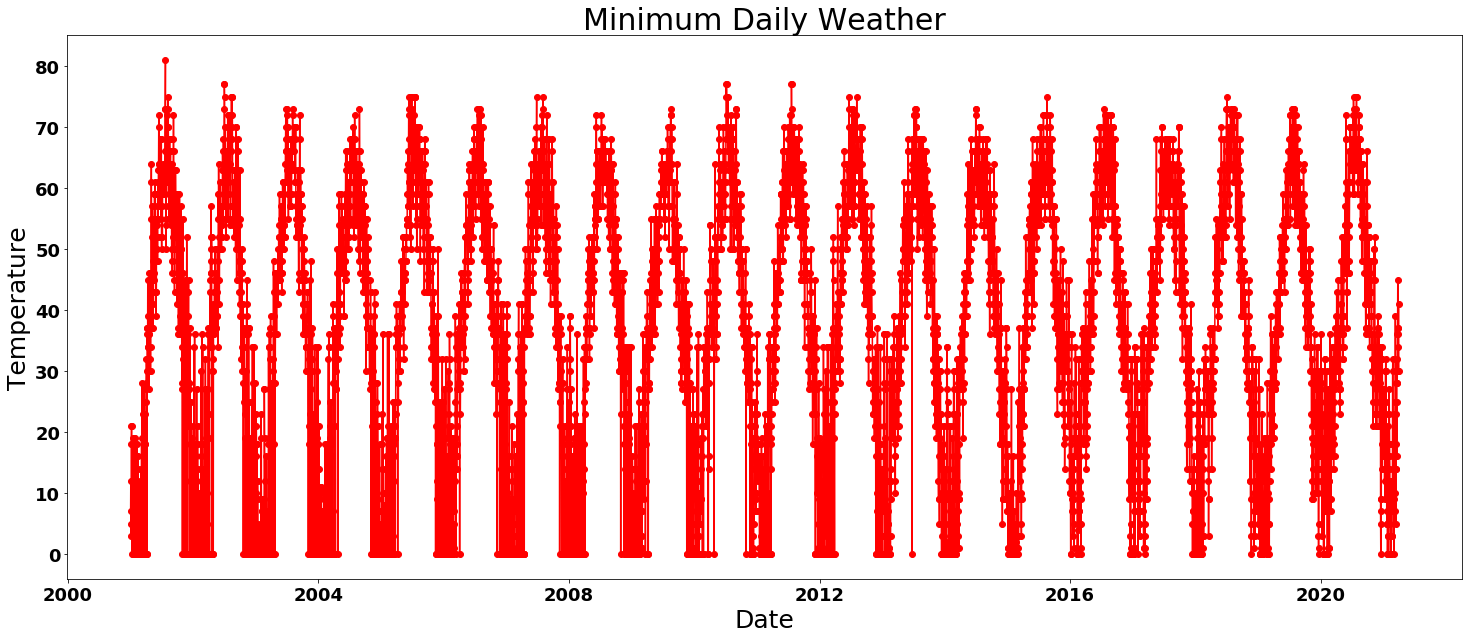

In [21]:
daily_df2=daily_df[(daily_df['Date']>"2001-01-01") & (daily_df['Date']<"2021-04-01")]
plt.rcParams["figure.figsize"] = (25,10)
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.plot(daily_df2['Date'], daily_df2['Temperature_Fahrenheit_min'], color='red', marker='o')
plt.title('Minimum Daily Weather', fontsize=30)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Temperature', fontsize=25)
plt.grid(False)
plt.show()

C:\Users\Chike\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Minimum Temperature')

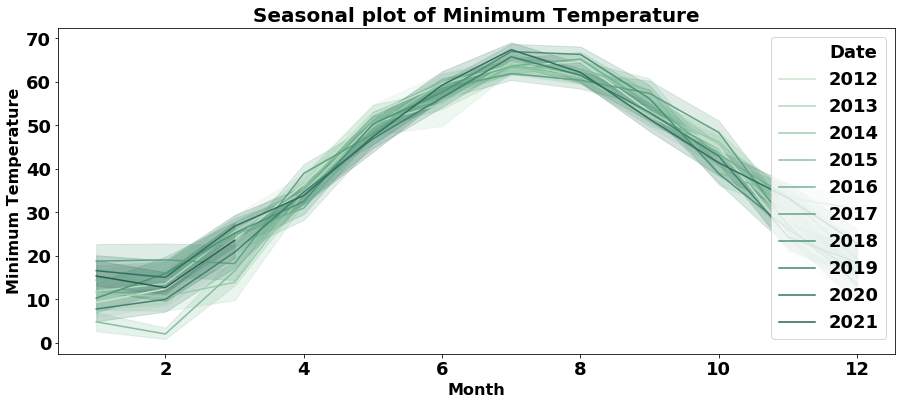

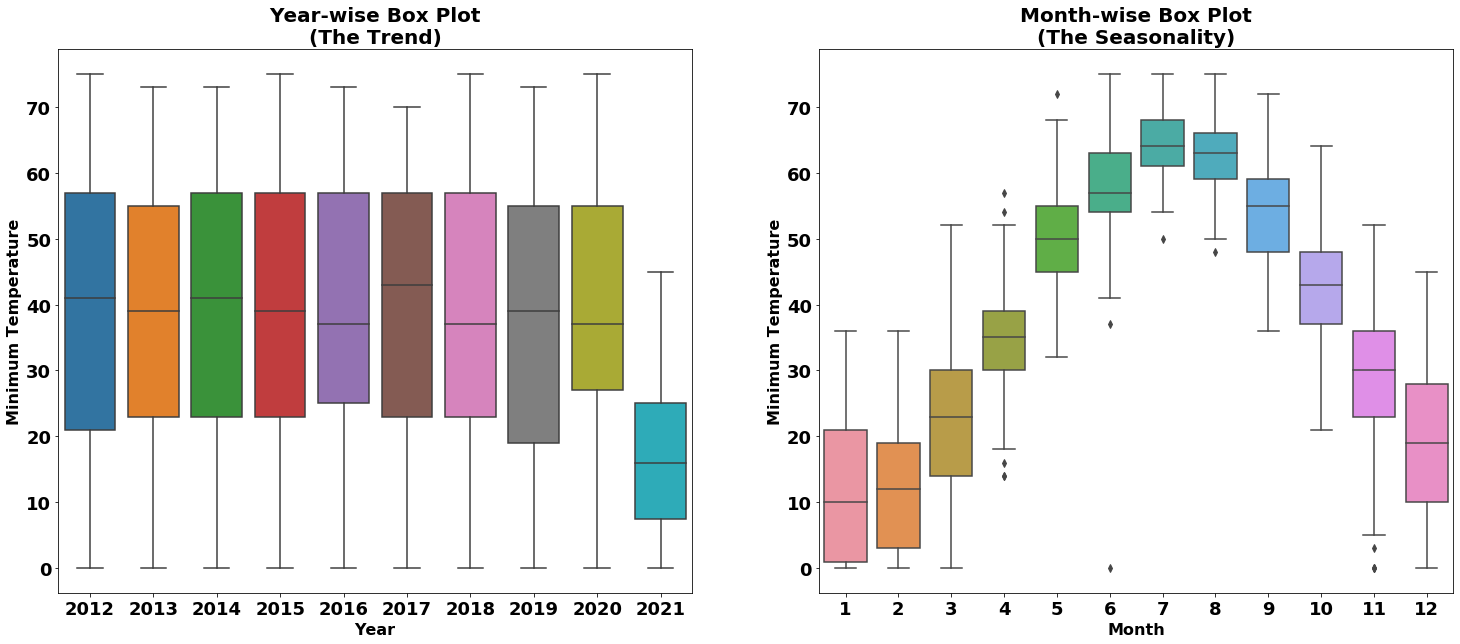

In [39]:
daily_df2=daily_df[(daily_df['Date']>"2012-01-01") & (daily_df['Date']<"2021-04-01")]

fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(daily_df2['Date'].dt.month, daily_df2['Temperature_Fahrenheit_min'], hue=daily_df2['Date'].dt.year, palette=palette)
ax.set_title('Seasonal plot of Minimum Temperature', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Minimum Temperature', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

sns.boxplot(daily_df2['Date'].dt.year,daily_df2['Temperature_Fahrenheit_min'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Minimum Temperature', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(daily_df2['Date'].dt.month, daily_df2['Temperature_Fahrenheit_min'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Minimum Temperature', fontsize = 16, fontdict=dict(weight='bold'))


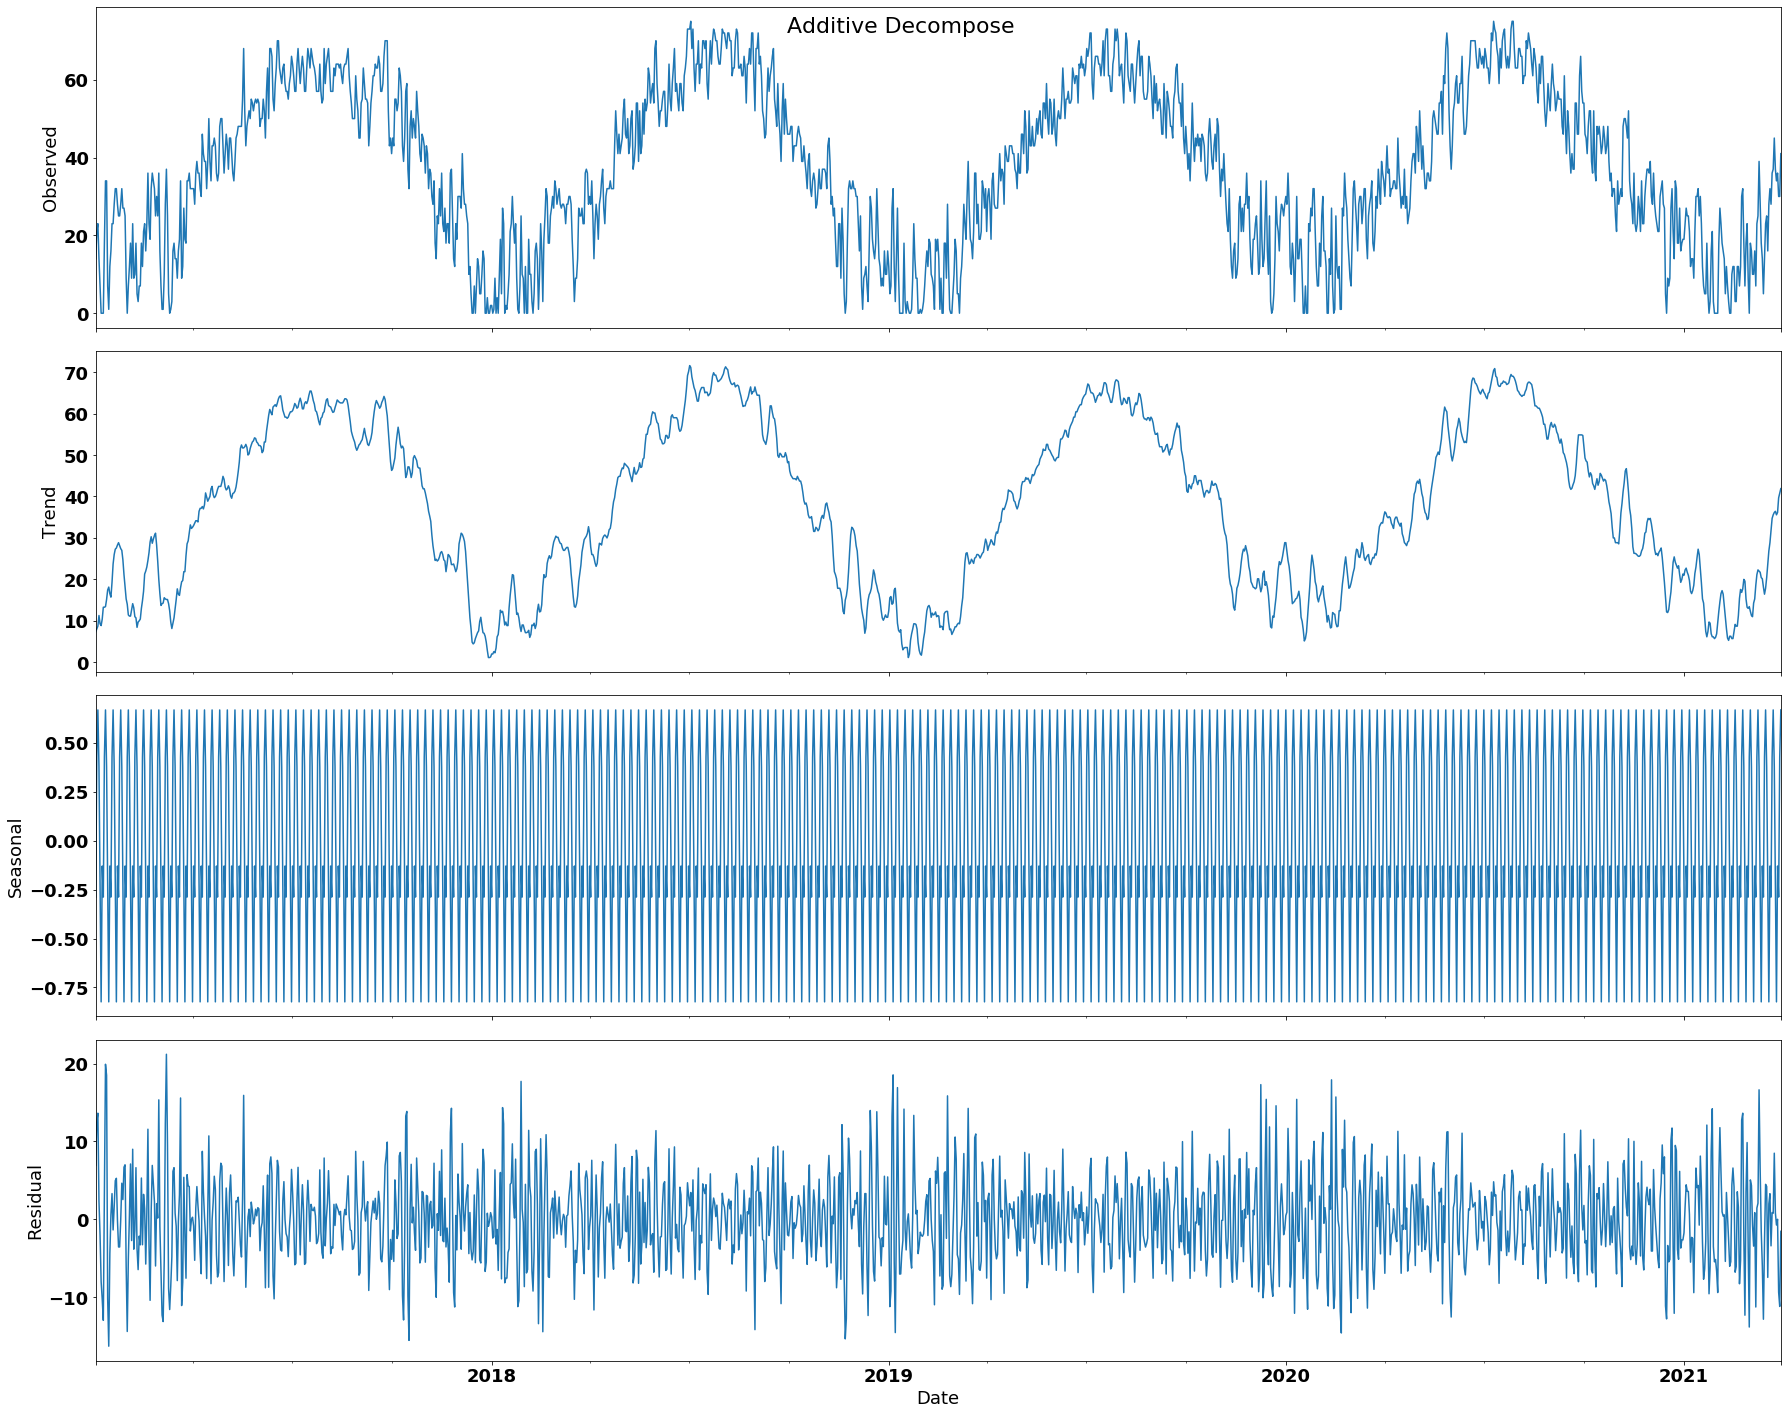

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
daily_df2=daily_df[(daily_df['Date']>"2017-01-01") & (daily_df['Date']<"2021-04-01")].set_index('Date')

# Multiplicative Decomposition 
# result_mul = seasonal_decompose(daily_df2['Temperature_Fahrenheit_min'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(daily_df2['Temperature_Fahrenheit_min'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (25,20)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [41]:
# daily_df2=daily_df[(daily_df['Date']>"2010-01-01") & (daily_df['Date']<"2021-04-01")]
# daily_df2['year'] = daily_df2.Date.dt.year
# daily_df2['month'] = daily_df2.Date.dt.month
# years = daily_df2['year'].unique()

# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16,12), dpi= 80)
# for i, y in enumerate(years):
#     if i > 0:        
#         plt.plot('month', 'value', data=daily_df2.loc[daily_df2.year==y, :], color=mycolors[i], label=y)
#         plt.text(daily_df2.loc[daily_df2.year==y, :].shape[0]-.9, daily_df2.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
# plt.show()